In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.optimize import minimize 

import sys
import os

import warnings
warnings.filterwarnings("ignore")

In [6]:
# return an array with the total number of collaboration for each year
def get_collabs_event():
    file = 'myDATA/00-collaboration_df_with_starting_years.csv'
    collaborations_df = pd.read_csv(file)
    num_colls_by_y = []
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        # total number of collaborations in the given year
        num_colls_by_y.append(collaborations_df[y].sum())
    return num_colls_by_y

In [7]:
# GLOBAL NOTEBOOK SETTINGS
YEARS = [str(year) for year in range(1990,2019)]

hole_size = 28
events = get_collabs_event() 

In [8]:
# get all collaboration data for given hole size
def get_collabs_by_hole_size(size):
    file = "myDATA/collabs_by_hole_size/" + str(size) + ".csv"
    if(os.path.exists(file)):
        return pd.read_csv(file)
    return -1


# get all collaboration data for given hole size and starting year
def get_collabs_by_hole_size(size, start_y):
    file = "myDATA/collabs_by_hole_size_and_start_year/" 
    file += str(size) + "_hole_size_splitted/"
    file += str(start_y) + "_collabs_by_starting_year.csv"
    
    if(os.path.exists(file)):
        return pd.read_csv(file)
    return -1

# return the average trajectory for the given hole size and starting publication year
def get_avg_trajectories(events, hole_size, start_y):
    
    df_y = get_collabs_by_hole_size(hole_size, start_y)
    
    x, y=[], []
    j=YEARS.index(start_y)
    for i in df_y:
        if(i!="ID"):
            y.append(df_y[i].mean())
            x.append(events[j])
            j+=1
    return x, y

# **(1) Plot average trajectories**

<center><img src="../assets/0.png" style="width: 1000px;"></center>

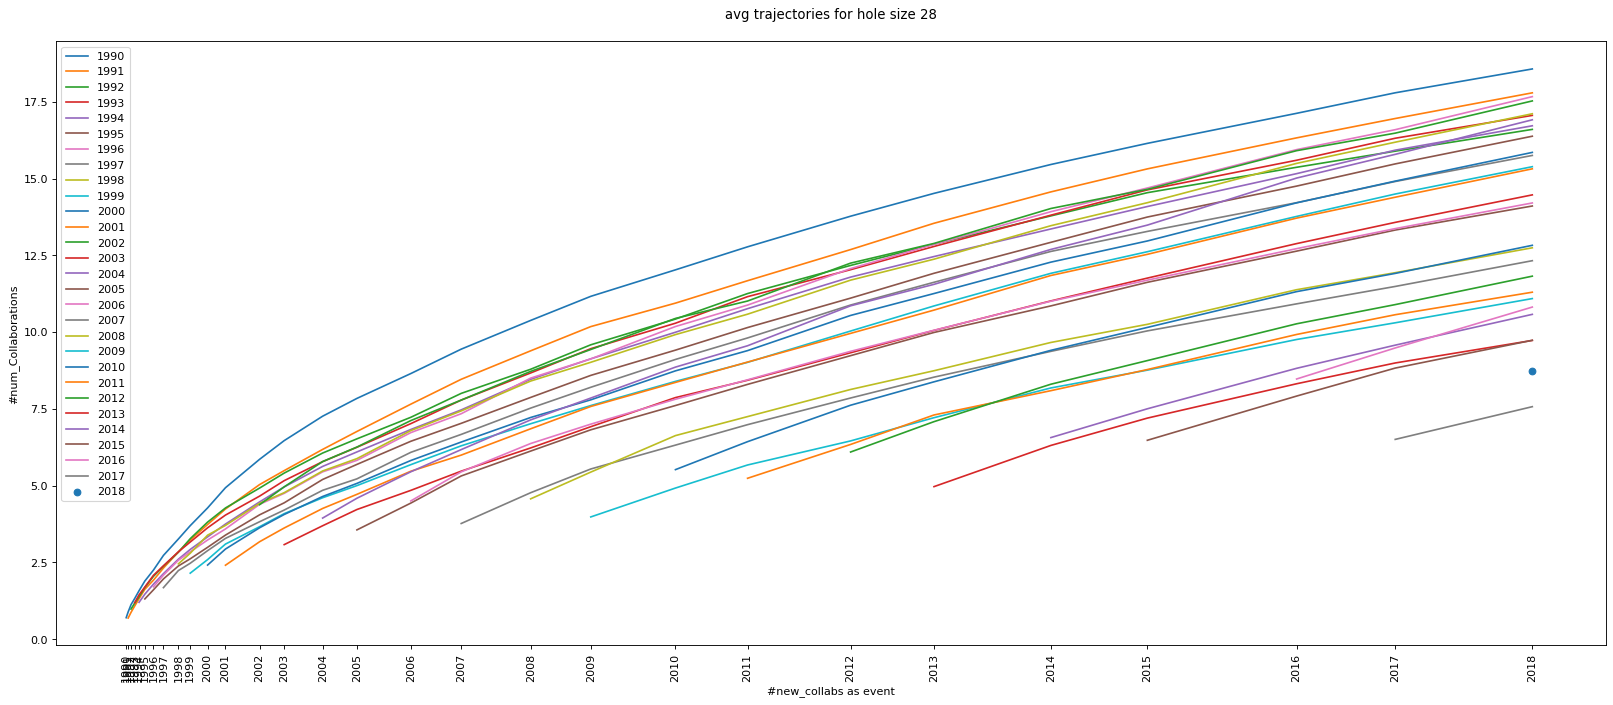

In [57]:
## Plot average trajectories 

plt.figure(figsize=(25, 10), dpi=80)

plt.title("avg trajectories for hole size " + str(hole_size) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")

plt.xticks(rotation='vertical')

for start_y in YEARS:

    x,y = get_avg_trajectories(events, hole_size, start_y)
    
    if(len(y)==1):
        plt.scatter(x,y)
    else:
        plt.plot(x,y)
    
    plt.xticks(x, y)
    plt.xticks(rotation='vertical')
    
plt.legend(YEARS, loc='upper left')
plt.xticks(events, YEARS)
plt.show()

# **(2) Plotting fitting function**

<center><img src="../assets/1.jpg" style="width: 1000px;"></center>

In [183]:
# Theoretichal vertex trajectory for stretched exponential distribution
def func(x, a, b, curr_x):
    return a* pow((np.log(x/curr_x) + 1), b)

# Method to fit the theoretical trajectory to the given average trajectory 
def fit_trajectory(xdata, ydata, curr_x):
    
    popt, pcov = curve_fit(lambda x, a, b: func(x, a, b, curr_x), xdata, ydata, maxfev=5000)
    alpha = popt[0]
    beta = popt[1]

    return func(xdata, alpha, beta, curr_x), alpha, beta 

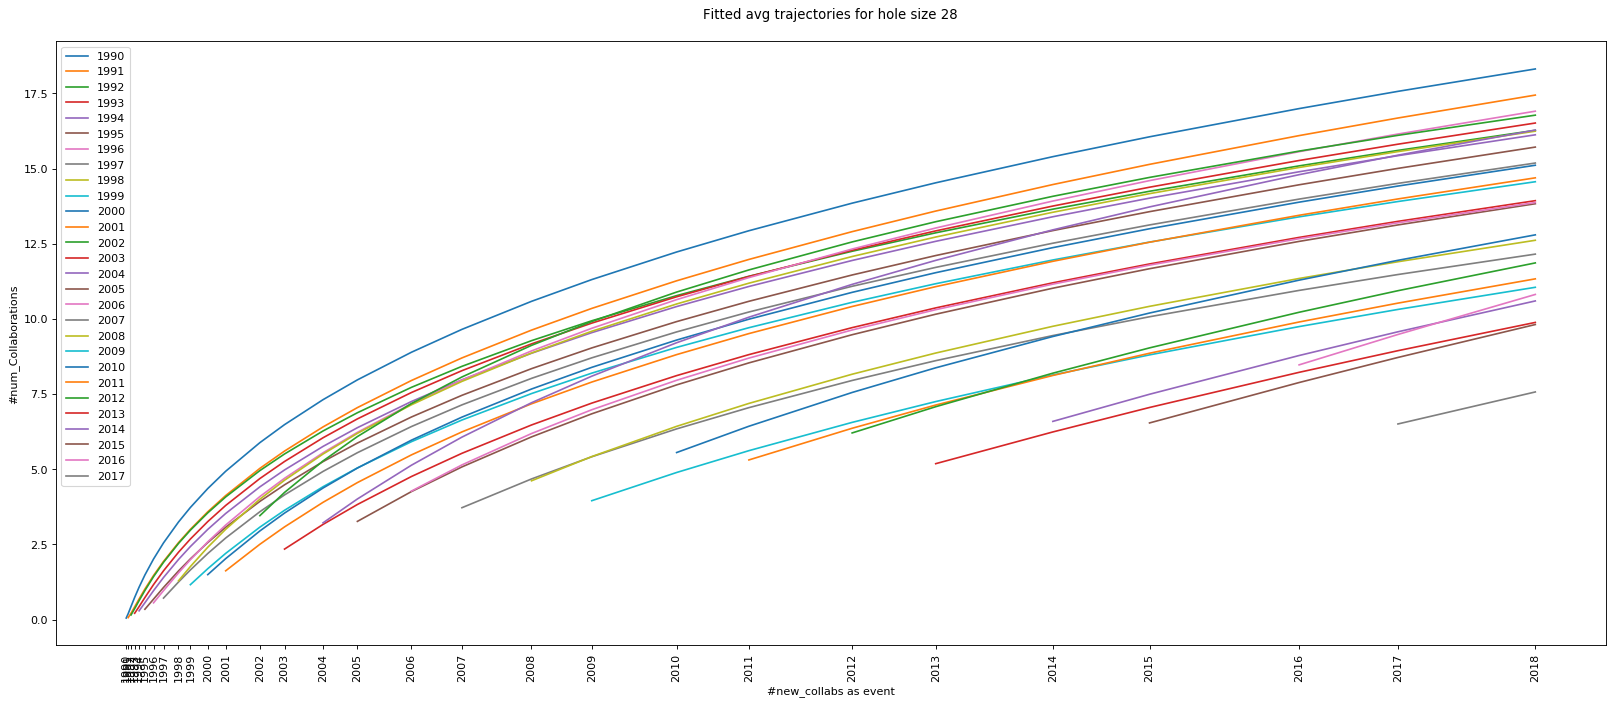

In [184]:
## Plot fitted average trjectories

plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted avg trajectories for hole size " + str(hole_size) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

alphas = []
betas = []
for start_y in YEARS[:-1]:

    curr_x = events[YEARS.index(start_y)]  
    x,y = get_avg_trajectories(events, hole_size, start_y) # retrieve average trajecory for the given start_y (and hole size) 
    
    fit_y, alpha, beta = fit_trajectory(x, y, curr_x) # fit the real data above with the theoretical trajectory 

    # save fitted parameters alpha, beta
    alphas.append(alpha)
    betas.append(beta)
    
    if(len(y)==1):
        plt.scatter(x,fit_y)
    else:
        plt.plot(x,fit_y)
    
    plt.xticks(x, fit_y)
    plt.xticks(rotation='vertical')
    
plt.legend(YEARS, loc='upper left')
plt.xticks(events, YEARS)
plt.show()

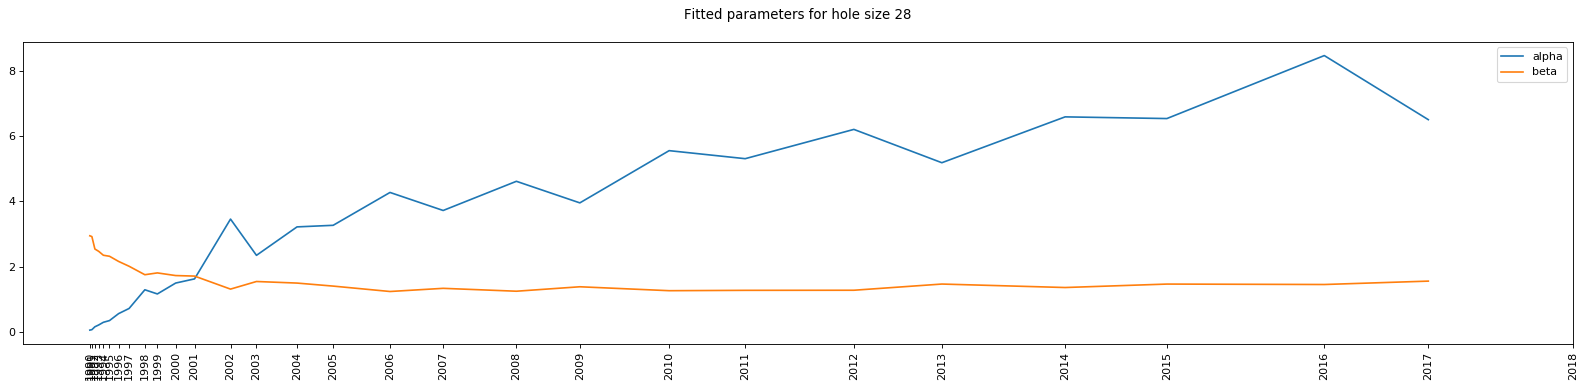

   start_y     alpha      beta
0     1990  0.052229  2.945541
1     1991  0.066069  2.921379
2     1992  0.154545  2.539907
3     1993  0.210791  2.468087
4     1994  0.292164  2.348714
5     1995  0.344879  2.317650
6     1996  0.558043  2.159069
7     1997  0.716271  2.010816
8     1998  1.289671  1.751494
9     1999  1.161873  1.807135
10    2000  1.495691  1.725676
11    2001  1.623524  1.709678
12    2002  3.457902  1.310306
13    2003  2.345930  1.543521
14    2004  3.218471  1.495270
15    2005  3.267107  1.402426
16    2006  4.274786  1.236836
17    2007  3.721863  1.333927
18    2008  4.616882  1.245440
19    2009  3.955028  1.381840
20    2010  5.557048  1.261548
21    2011  5.310683  1.272497
22    2012  6.208824  1.275338
23    2013  5.186650  1.465240
24    2014  6.593064  1.358855
25    2015  6.541392  1.464503
26    2016  8.473198  1.451313
27    2017  6.507219  1.555216


In [12]:
## Plotting and Printing fitted parameters alpha and beta for each starting year
plt.figure(figsize=(25, 5), dpi=80)
plt.title("Fitted parameters for hole size " + str(hole_size) + "\n", fontdict = {'fontsize' : 12})
plt.plot(events[:-1], alphas, label="alpha")
plt.plot(events[:-1], betas, label="beta")
plt.xticks(events, YEARS)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

print(pd.DataFrame([[YEARS[i], alphas[i], betas[i]] for i in range(len(alphas))], columns=["start_y", "alpha", "beta"]))

# **(3)** Find **alpha\* and beta\*** to have a function **f\*** minimizing the **errors** 

<center><img src="../assets/3.jpg" style="width: 650px;"></center>

In [67]:
## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_A(params, xdata, hole_size):
    opt_alpha, opt_beta = params
    err = 0
    for start_y in YEARS[:-1]:
        i = YEARS.index(start_y)
        x,y = get_avg_trajectories(xdata, hole_size, start_y)
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
            err += pow(abs(func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2)
    return err


## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with real data 
def err_f_B(params, xdata, hole_size):
    opt_alpha, opt_beta = params
    
    err = 0
    for start_y in YEARS[:-1]:
        i = YEARS.index(start_y)
        
        x,y = get_avg_trajectories(xdata, hole_size, start_y)
        
        tmp = []
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
        
            tmp.append(pow(abs(func(xdata[e], opt_alpha, opt_beta, xdata[i]) - y[YEARS[i:][:-1].index(curr_y)]), 2))
        err += np.max(tmp)
         
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
def err_f_C(params, xdata, hole_size):
    
    opt_alpha, opt_beta = params
    
    err = 0
    for start_y in YEARS[:-1]:
        i = YEARS.index(start_y)    
        curr_x = events[i]  
        
        x,y = get_avg_trajectories(xdata, hole_size, start_y)
        fit_y, alpha, beta = fit_trajectory(x, y, curr_x) # fit the real data above with the theoretical trajectory 

        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
            err += pow(abs(func(xdata[e], opt_alpha, opt_beta, xdata[i]) - func(xdata[e], alpha, beta, xdata[i])), 2)
         
    return err

## error function to minimize in order to find alpha* and beta*
    ## this function compare f* with fitted data f_i 
def err_f_D(params, xdata, hole_size):
    
    opt_alpha, opt_beta = params
    
    err = 0
    for start_y in YEARS[:-1]:
        i = YEARS.index(start_y)
        
        curr_x = events[i]  

        x,y = get_avg_trajectories(xdata, hole_size, start_y)
        fit_y, alpha, beta = fit_trajectory(x, y, curr_x) # fit the real data above with the theoretical trajectory 

        tmp = []
        for curr_y in YEARS[i:][:-1]:
            e = YEARS.index(curr_y)
        
            tmp.append(pow(abs(func(xdata[e], opt_alpha, opt_beta, xdata[i]) - func(xdata[e], alpha, beta, xdata[i])), 2))
        err += np.max(tmp)
         
    return err


In [68]:
## optimize alpha* and beta* for each error function defined above 
alphas_opt,betas_opt, errs = [],[],[]

# retrieve alpha* and beta* minimizing the associated function
result_A = minimize(err_f_A, [1, 1], args=(events, hole_size))
result_B = minimize(err_f_B, [1, 1], args=(events, hole_size))
result_C = minimize(err_f_C, [1, 1], args=(events, hole_size))
result_D = minimize(err_f_D, [1, 1], args=(events, hole_size))

fitted_params_A = result_A.x
fitted_params_B = result_B.x
fitted_params_C = result_C.x
fitted_params_D = result_D.x

alphas_opt.append(fitted_params_A[0])
betas_opt.append(fitted_params_A[1])

alphas_opt.append(fitted_params_B[0])
betas_opt.append(fitted_params_B[1])


alphas_opt.append(fitted_params_C[0])
betas_opt.append(fitted_params_C[1])

alphas_opt.append(fitted_params_D[0])
betas_opt.append(fitted_params_D[1])

# compute the error made by the optimized parameters 
errs.append(err_f_A(fitted_params_A, events, hole_size))
errs.append(err_f_B(fitted_params_B, events, hole_size))
errs.append(err_f_C(fitted_params_C, events, hole_size))
errs.append(err_f_D(fitted_params_D, events, hole_size))

print(pd.DataFrame([[errs[i], alphas_opt[i], betas_opt[i]] for i in range(len(errs))], ["err_f_A", "err_f_B", "err_f_C", "err_f_D"], ["ERROR", "alpha", "beta",]))

               ERROR     alpha      beta
err_f_A  4529.074755  4.314193  0.590249
err_f_B   620.851259  6.080949  0.450102
err_f_C  4854.966845  4.110277  0.627425
err_f_D   668.579993  5.277520  0.544696


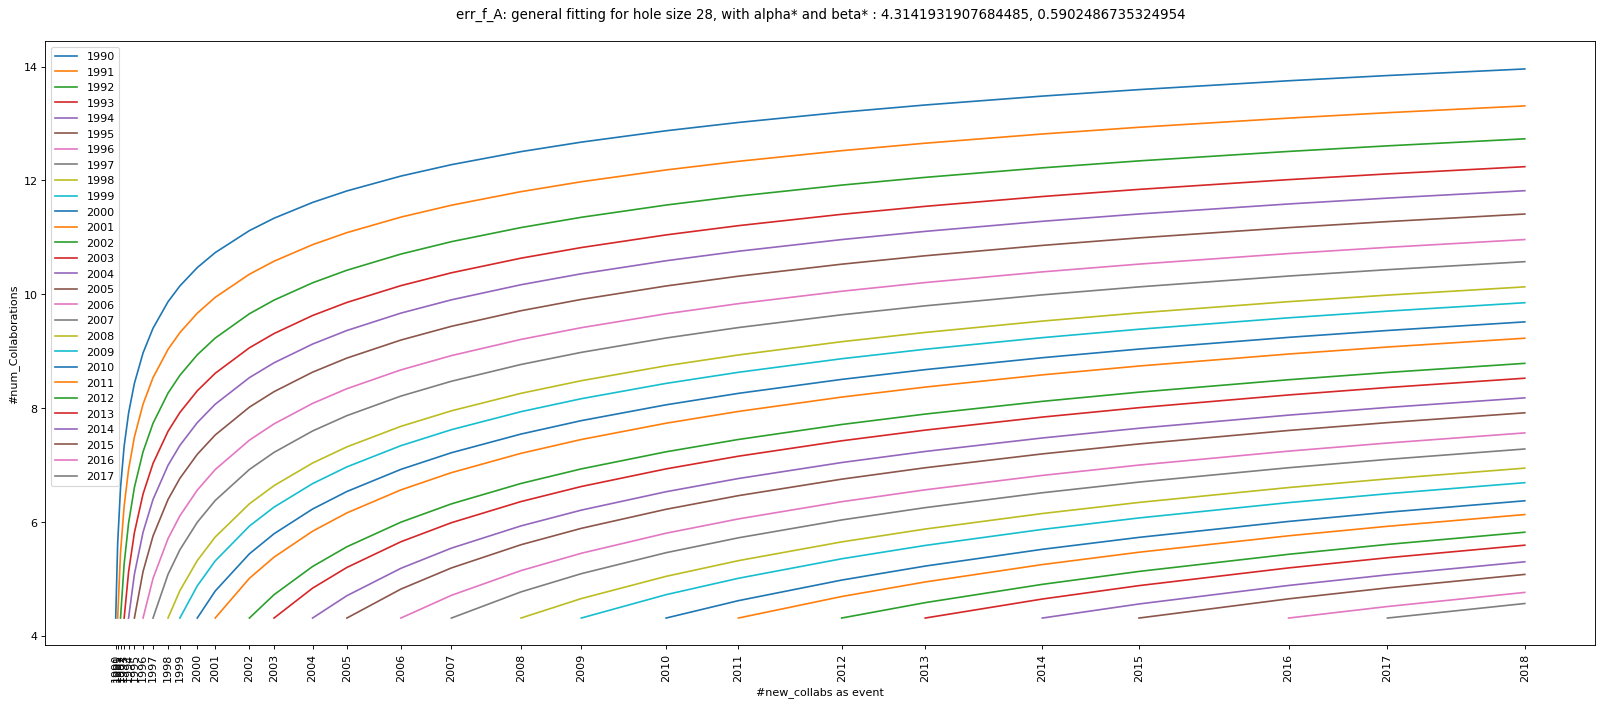

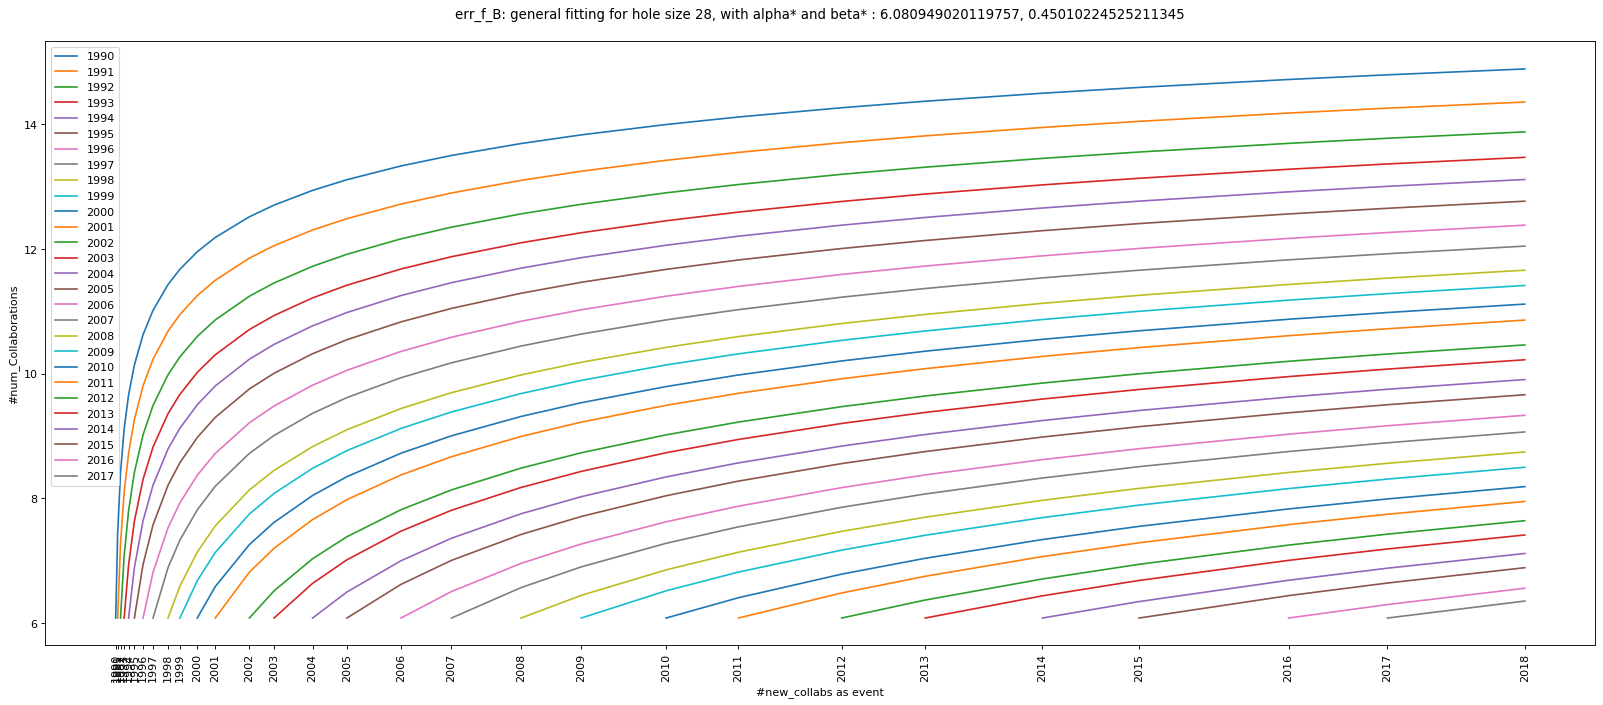

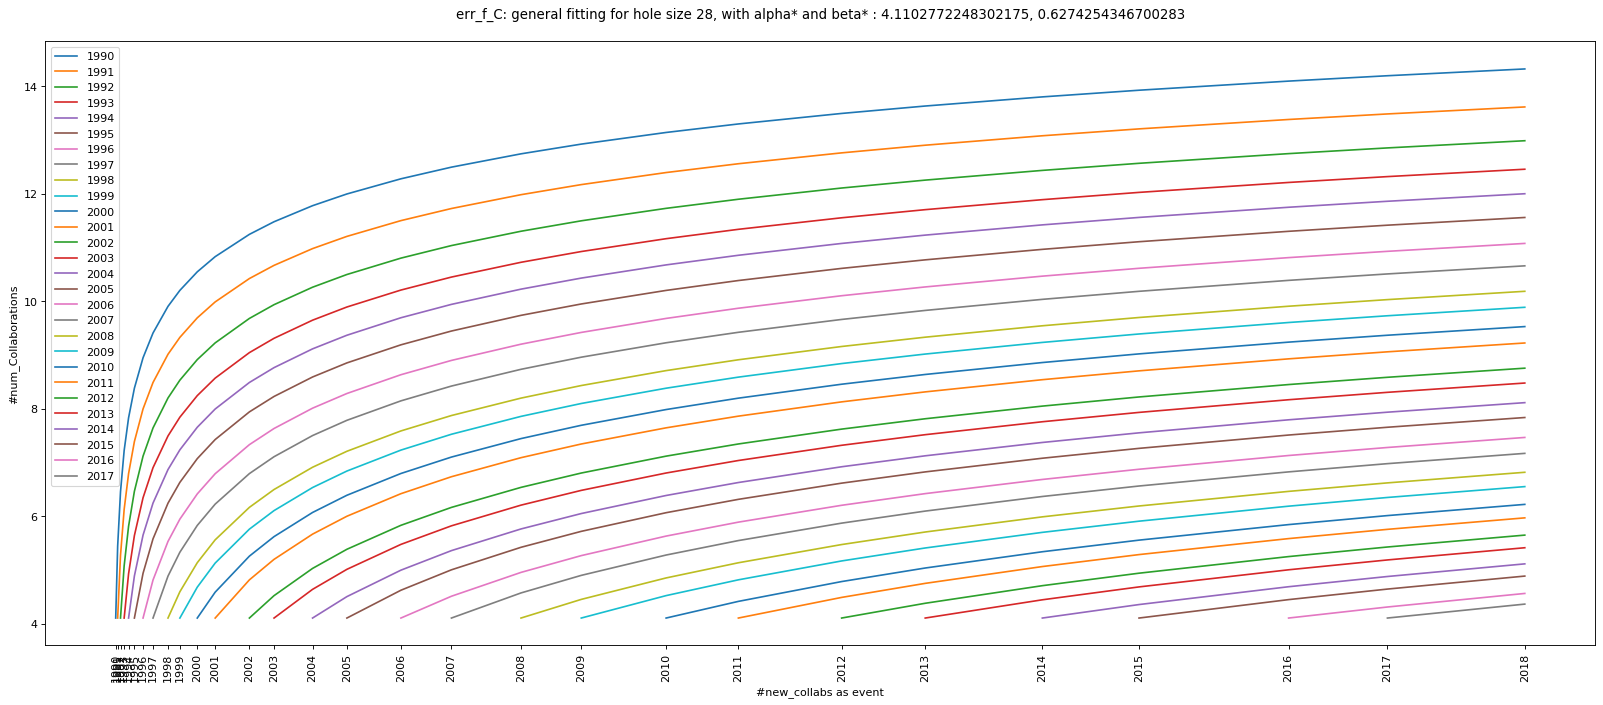

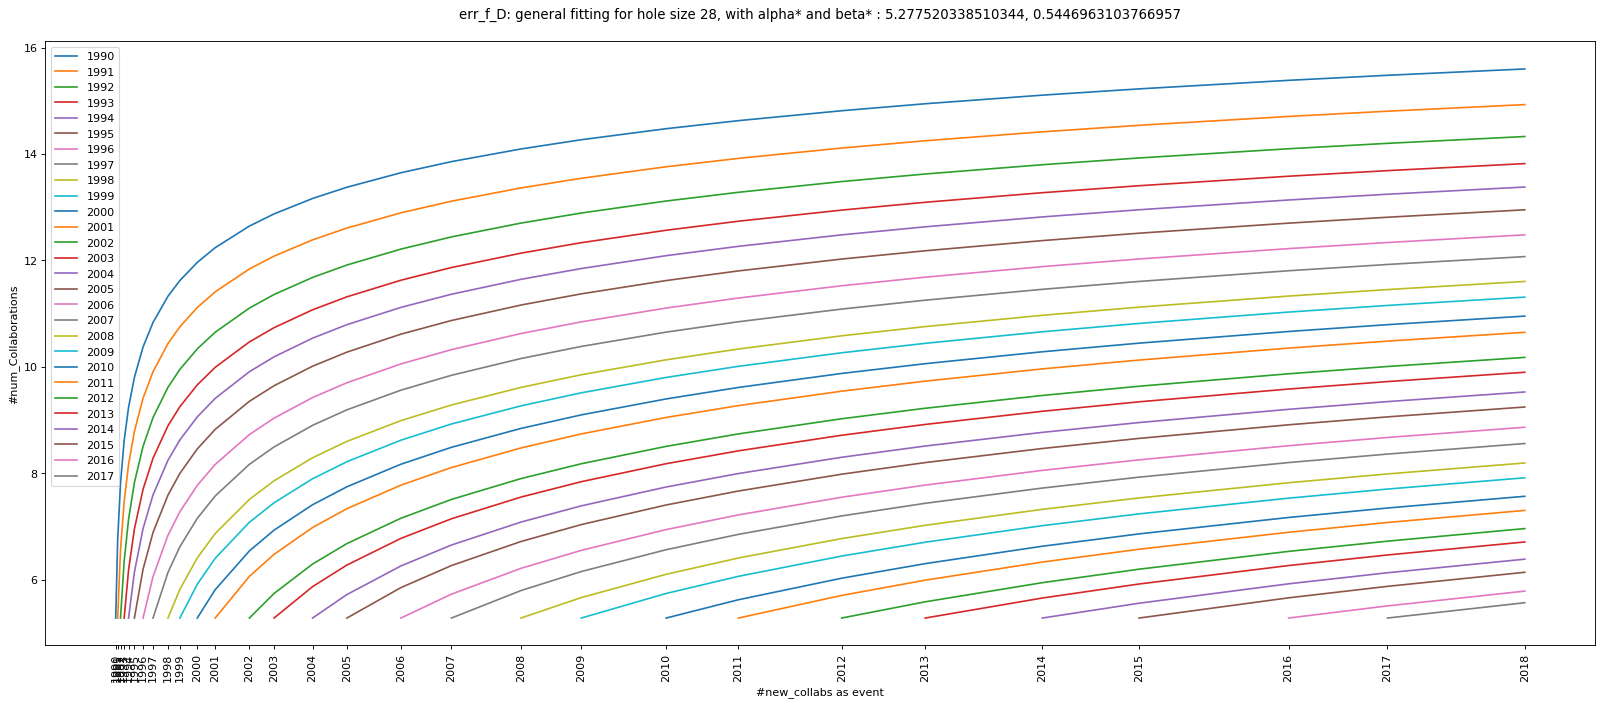

In [69]:
## Plot general fitting function for each couple of parameter found above 
error_f_labels = ["err_f_A", "err_f_B", "err_f_C", "err_f_D"] 
for i in range(len(errs)):
    plt.figure(figsize=(25, 10), dpi=80)
    plt.title(error_f_labels[i] + ": general fitting for hole size " + str(hole_size) + ", with alpha* and beta* : " + str(alphas_opt[i]) + ", " + str(betas_opt[i]) + "\n", fontdict = {'fontsize' : 12})
    plt.xlabel("#new_collabs as event")
    plt.ylabel("#num_Collaborations")
    plt.xticks(rotation='vertical')

    for start_y in YEARS[:-1]:

        curr_x = events[YEARS.index(start_y)]  
        x,y = get_avg_trajectories(events, hole_size, start_y) # retrieve average trajecory for the given start_y (and hole size) 
        
        general_fit_y = func(x, alphas_opt[i], betas_opt[i], curr_x)
        
        if(len(y)==1):
            plt.scatter(x,general_fit_y)
        else:
            plt.plot(x,general_fit_y)
        
        plt.xticks(x, general_fit_y)
        plt.xticks(rotation='vertical')
        
    plt.legend(YEARS, loc='upper left')
    plt.xticks(events, YEARS)
    plt.show()

# **(4) fit and shift of average trajectories, then computed their average and fitted**

<center><img src="../assets/4.png" ></center>

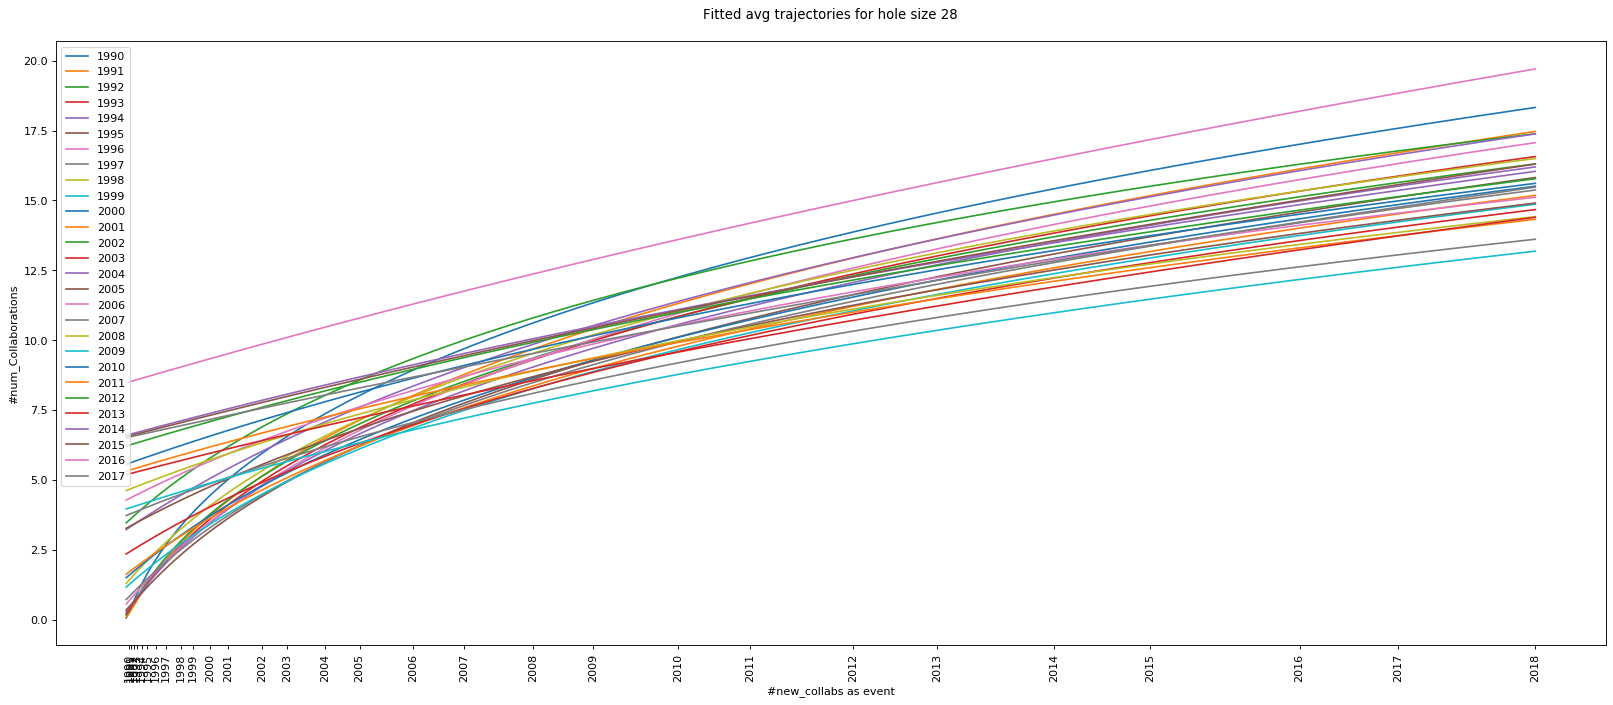

In [187]:
## Plot shifted and fitted average trjectories

plt.figure(figsize=(25, 10), dpi=80)
plt.title("Fitted avg trajectories for hole size " + str(hole_size) + "\n", fontdict = {'fontsize' : 12})
plt.xlabel("#new_collabs as event")
plt.ylabel("#num_Collaborations")
plt.xticks(rotation='vertical')

for start_y in YEARS[:-1]:
    
    curr_x = events[YEARS.index(start_y)]  
    x,y = get_avg_trajectories(events, hole_size, start_y) # retrieve average trajecory for the given start_y (and hole size) 

    fit_y, alpha, beta = fit_trajectory(x, y, curr_x) # fit the real data above with the theoretical trajectory 

    fit_y = (func([asd for asd in range(curr_x, curr_x+events[-1])], alpha, beta, curr_x))

    if(len(y)==1):
        plt.scatter([asd for asd in range(0, events[-1])], fit_y)
    else:
        plt.plot([asd for asd in range(0, events[-1])], fit_y)

plt.xticks(x, fit_y)
plt.xticks(rotation='vertical')
        
plt.legend(YEARS, loc='upper left')
plt.xticks(events, YEARS)
plt.show()